<a href="https://colab.research.google.com/github/justineMD2002/4-Input-Logic-AND-using-Backpropagation-Neural-Network/blob/master/ClusteringML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense, Dropout
from keras.optimizers import Adam
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [177]:
df = pd.read_csv('/content/drive/MyDrive/datasets/patient_priority.csv')
df

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status,triage
0,0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.00,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked,yellow
1,1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.00,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
2,2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.00,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked,yellow
3,3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.00,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
4,4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.00,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,5105,80.0,0.0,0.0,111.0,153.0,166.0,0.0,83.75,31.0,108.0,18.6,0.467386,1.0,0.0,Urban,never smoked,yellow
6958,5106,81.0,0.0,0.0,123.0,157.0,160.0,0.0,125.20,23.0,89.0,40.0,0.467386,0.0,0.0,Urban,never smoked,yellow
6959,5107,81.0,0.0,0.0,127.0,185.0,141.0,0.0,82.99,41.0,95.0,30.6,0.467386,0.0,0.0,Rural,never smoked,yellow
6960,5108,51.0,1.0,0.0,123.0,161.0,162.0,0.0,166.29,34.0,93.0,25.6,0.467386,0.0,0.0,Rural,formerly smoked,green


In [178]:
df.isnull().sum()

Unnamed: 0             0
age                    0
gender                 1
chest pain type        0
blood pressure         0
cholesterol            0
max heart rate         0
exercise angina        0
plasma glucose         0
skin_thickness         0
insulin                0
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
Residence_type         0
smoking_status         0
triage               410
dtype: int64

In [179]:
df_cleaned = df.copy()
df_cleaned.drop(df_cleaned.columns[0], axis=1, inplace=True)
df_cleaned = df_cleaned.dropna()
df_cleaned.isnull().sum()

age                  0
gender               0
chest pain type      0
blood pressure       0
cholesterol          0
max heart rate       0
exercise angina      0
plasma glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
Residence_type       0
smoking_status       0
triage               0
dtype: int64

In [180]:
converter = LabelEncoder()

df_cleaned['Residence_type'] = converter.fit_transform(df_cleaned['Residence_type'])

residence_type_mapping = dict(zip(converter.classes_, converter.transform(converter.classes_)))
print("Mapping of Residence Type:")
print(residence_type_mapping)

df_cleaned['smoking_status'] = converter.fit_transform(df_cleaned['smoking_status'])

smoking_status_mapping = dict(zip(converter.classes_, converter.transform(converter.classes_)))
print("\nMapping of Smoking Status:")
print(smoking_status_mapping)

triage_order = ['Green', 'Yellow', 'Orange', 'Red']

df_cleaned['triage'] = df_cleaned['triage'].map({'green': 0, 'yellow': 1, 'orange': 2, 'red': 3})

print("\nMapping of Triage:")
for category, encoded_value in zip(triage_order, range(len(triage_order))):
    print(f"{category}: {encoded_value}")


Mapping of Residence Type:
{'Rural': 0, 'Urban': 1}

Mapping of Smoking Status:
{'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}

Mapping of Triage:
Green: 0
Yellow: 1
Orange: 2
Red: 3


In [181]:
df_cleaned

,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status,triage
0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.00,43.0,92.0,19.0,0.467386,0.0,0.0,1,2,1
1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.00,47.0,90.0,18.0,0.467386,0.0,0.0,1,2,2
2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.00,53.0,102.0,23.0,0.467386,0.0,0.0,1,2,1
3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.00,51.0,118.0,18.0,0.467386,0.0,0.0,1,2,2
4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.00,90.0,83.0,21.0,0.467386,0.0,0.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,80.0,0.0,0.0,111.0,153.0,166.0,0.0,83.75,31.0,108.0,18.6,0.467386,1.0,0.0,1,2,1
6958,81.0,0.0,0.0,123.0,157.0,160.0,0.0,125.20,23.0,89.0,40.0,0.467386,0.0,0.0,1,2,1
6959,81.0,0.0,0.0,127.0,185.0,141.0,0.0,82.99,41.0,95.0,30.6,0.467386,0.0,0.0,0,2,1
6960,51.0,1.0,0.0,123.0,161.0,162.0,0.0,166.29,34.0,93.0,25.6,0.467386,0.0,0.0,0,1,0


In [182]:
print(df_cleaned.dtypes)

age                  float64
gender               float64
chest pain type      float64
blood pressure       float64
cholesterol          float64
max heart rate       float64
exercise angina      float64
plasma glucose       float64
skin_thickness       float64
insulin              float64
bmi                  float64
diabetes_pedigree    float64
hypertension         float64
heart_disease        float64
Residence_type         int64
smoking_status         int64
triage                 int64
dtype: object


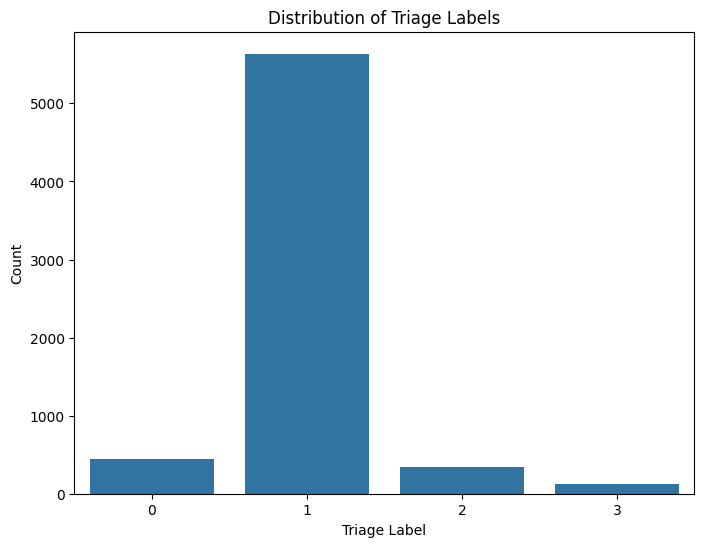

Correlation of features with triage label:
triage               1.000000
chest pain type      0.332216
cholesterol          0.209020
exercise angina      0.172484
blood pressure       0.111257
Residence_type       0.095819
gender               0.051889
smoking_status       0.021824
skin_thickness       0.019890
insulin             -0.030615
max heart rate      -0.030616
diabetes_pedigree   -0.047285
heart_disease       -0.071792
hypertension        -0.111016
bmi                 -0.223713
age                 -0.255382
plasma glucose      -0.416346
Name: triage, dtype: float64


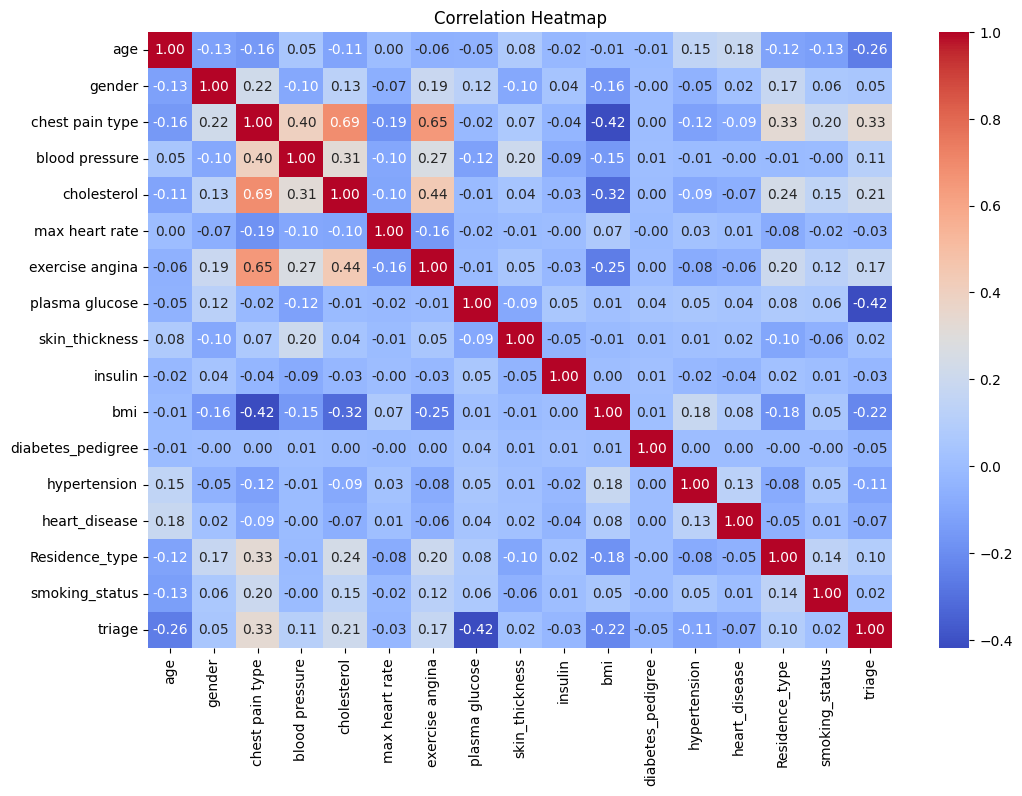


ANOVA results for features across different triage labels:
Feature: age, F-statistic: 276.153565753186, p-value: 8.761650661495471e-169
Feature: gender, F-statistic: 33.69585802410788, p-value: 1.3246350663027306e-21
Feature: chest pain type, F-statistic: 317.429623981947, p-value: 1.9893083269890014e-192
Feature: blood pressure, F-statistic: 164.65486922764853, p-value: 6.677934141065918e-103
Feature: cholesterol, F-statistic: 117.5359503467611, p-value: 3.8759241204061675e-74
Feature: max heart rate, F-statistic: 2.694548798099296, p-value: 0.04440139178270224
Feature: exercise angina, F-statistic: 72.98065209676496, p-value: 2.0044697230811493e-46
Feature: plasma glucose, F-statistic: 2303.366352669977, p-value: 0.0
Feature: skin_thickness, F-statistic: 16.23540009524656, p-value: 1.6426963512638523e-10
Feature: insulin, F-statistic: 4.311132946598359, p-value: 0.004809192729794524
Feature: bmi, F-statistic: 156.51856278662228, p-value: 5.6426147573515474e-98
Feature: diabetes_pedi

In [183]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='triage')
plt.title('Distribution of Triage Labels')
plt.xlabel('Triage Label')
plt.ylabel('Count')
plt.show()

corr_with_triage = df_cleaned.corr()['triage'].sort_values(ascending=False)
print("Correlation of features with triage label:")
print(corr_with_triage)

plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

features = ['age', 'gender', 'chest pain type', 'blood pressure', 'cholesterol', 'max heart rate',
            'exercise angina', 'plasma glucose', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree',
            'hypertension', 'heart_disease', 'Residence_type', 'smoking_status']

anova_results = {}
for feature in features:
    groups = []
    for triage_label in df_cleaned['triage'].unique():
        groups.append(df_cleaned[df_cleaned['triage'] == triage_label][feature])
    f_statistic, p_value = stats.f_oneway(*groups)
    anova_results[feature] = {'F-statistic': f_statistic, 'p-value': p_value}

print("\nANOVA results for features across different triage labels:")
for feature, results in anova_results.items():
    print(f"Feature: {feature}, F-statistic: {results['F-statistic']}, p-value: {results['p-value']}")

In [184]:
print(df_cleaned['triage'].value_counts())

triage
1    5636
0     440
2     346
3     129
Name: count, dtype: int64


In [185]:
features = ['chest pain type', 'cholesterol', 'exercise angina', 'blood pressure', 'age', 'plasma glucose', 'bmi']
X = df_cleaned[features]
y = df_cleaned['triage']

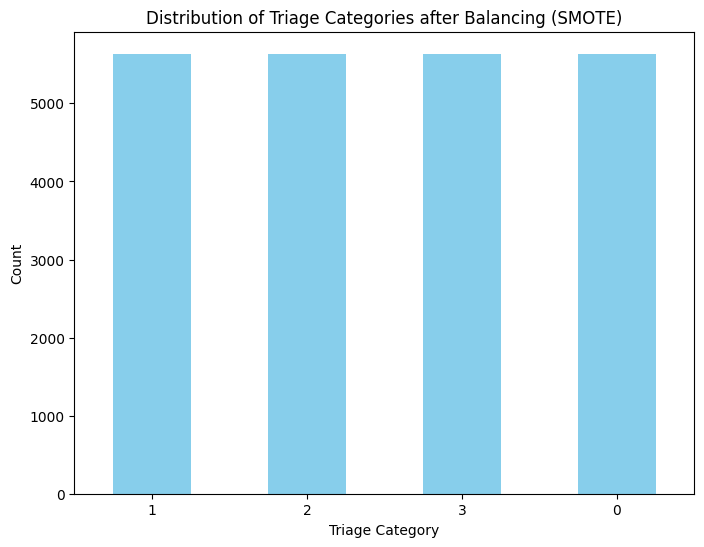

In [186]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

triage_counts = y_resampled.value_counts()
plt.figure(figsize=(8, 6))
triage_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Triage Categories after Balancing (SMOTE)')
plt.xlabel('Triage Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [191]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)

X_test_scaled = scaler.transform(X_test)

In [227]:
# Reshape input data for LSTM
n_features = X_train_scaled.shape[1]
n_steps = 1  # Since we are not dealing with sequences, each input is considered as one step
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], n_steps, n_features))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], n_steps, n_features))

In [240]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train_resampled)
y_test_cat = to_categorical(y_test)

model = Sequential()
model.add(Bidirectional(LSTM(128, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_reshaped, y_train_cat, epochs=30, batch_size=16, verbose=1, validation_data=(X_test_reshaped, y_test_cat))

Epoch 1/30
1131/1131 [==============================] - 7s 4ms/step - loss: 0.2950 - accuracy: 0.9300 - val_loss: 0.2807 - val_accuracy: 0.9062
Epoch 2/30
1131/1131 [==============================] - 6s 5ms/step - loss: 0.1250 - accuracy: 0.9662 - val_loss: 0.2473 - val_accuracy: 0.9222
Epoch 3/30
1131/1131 [==============================] - 5s 4ms/step - loss: 0.0999 - accuracy: 0.9738 - val_loss: 0.2036 - val_accuracy: 0.9390
Epoch 4/30
1131/1131 [==============================] - 4s 4ms/step - loss: 0.0817 - accuracy: 0.9789 - val_loss: 0.2000 - val_accuracy: 0.9336
Epoch 5/30
1131/1131 [==============================] - 6s 6ms/step - loss: 0.0689 - accuracy: 0.9820 - val_loss: 0.1669 - val_accuracy: 0.9443
Epoch 6/30
1131/1131 [==============================] - 4s 4ms/step - loss: 0.0589 - accuracy: 0.9845 - val_loss: 0.1773 - val_accuracy: 0.9436
Epoch 7/30
1131/1131 [==============================] - 4s 4ms/step - loss: 0.0511 - accuracy: 0.9867 - val_loss: 0.1754 - val_accuracy:

In [242]:
model.evaluate(X_test_reshaped, y_test_cat)

41/41 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.9741


[0.09192310273647308, 0.9740656018257141]

41/41 [==============================] - 0s 4ms/step


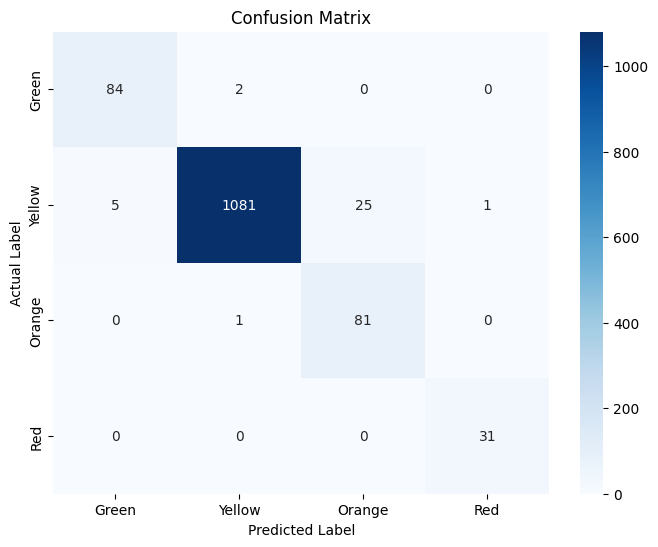

In [243]:
predictions_prob = model.predict(X_test_reshaped)

predictions = np.argmax(predictions_prob, axis=1)

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=triage_order, yticklabels=triage_order)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()